In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.generate_figures import plot_scatter_CMIP
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series

In [3]:
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
DIR_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
DIR_FIGURES = directory_information.DIR_OUTPUT_FIGURES

TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle','rb'))

In [4]:
from plants_and_TCR.process_data import make_processed_data_dict
RUNNAMES = ['1pctCO2', '1pctCO2-rad','1pctCO2-bgc','piControl']
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=RUNNAMES,
                                                                     varname='tas',
                                                                     input_path=DIR_REGRIDDED_DATA,
                                                                     cdict_names=['CMIP5','CMIP6'])

tas_1pctCO2-bgc_CMIP6_NorESM2-LM is not in the dictionary


In [29]:
VARNAME='tas'
CMIP_NAMES=['CMIP6']
END_YR=130
#if END_YR==70:
CLIM=[-1.0,1.0]
CLEVELS = np.arange(-1.0,1.1,0.1)
CBAR_INDS=np.arange(-1.0,1.1,0.2)
#elif END_YR==130:
#    CLIM=[-1.5,1.5]
#    CLEVELS = np.arange(-1.4,1.5,0.1)
#    CBAR_INDS=np.arange(-1.4,1.5,0.2)
    #CLIM=[-1.5,1.5]
    #CLEVELS = np.arange(-1.4,1.5,0.1)
    #CBAR_INDS=np.arange(-1.4,1.5,0.2)

COLOR_INTERVAL=0.2


In [26]:
[ds_all_models_tot_rad,
 multi_model_sum_tot_rad,
 positive_change_count_tot_rad,
 negative_change_count_tot_rad,
 num_tot_rad] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                 varname=VARNAME,
                                                                 end_yr=END_YR,
                                                                 change_cutoff=0,
                                                                 runname_inds=[2,0],
                                                                 cmip_names = CMIP_NAMES) 
[ds_all_models_phys_pi,
 multi_model_sum_phys_pi,
 positive_change_count_phys_pi,
 negative_change_count_phys_pi,
 num_phys_pi] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                                 varname=VARNAME,
                                                                 end_yr=END_YR,
                                                                 change_cutoff=0,
                                                                 runname_inds=[1,3],
                                                                 cmip_names = CMIP_NAMES)

[ds_all_models_int,
 multi_model_sum_int,
 positive_change_count_int,
 negative_change_count_int,
 num_int] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                           varname=VARNAME,
                                                           end_yr=END_YR,
                                                           change_cutoff=0,
                                                           runname_inds=[2,0,1,3],
                                                           cmip_names = CMIP_NAMES)

mostly_agree_tot_rad = multi_model_stats.calculate_where_models_mostly_agree(positive_change_count_tot_rad,
                                                                            negative_change_count_tot_rad,
                                                                            cut_off_num = 8, #5,#8,
                                                                    num_models=num_tot_rad)

mostly_agree_phys_pi = multi_model_stats.calculate_where_models_mostly_agree(positive_change_count_phys_pi,
                                                                            negative_change_count_phys_pi,
                                                                            cut_off_num =  8,#5,#8,
                                                                            num_models=num_phys_pi)
mostly_agree_int = multi_model_stats.calculate_where_models_mostly_agree(positive_change_count_int,
                                                                            negative_change_count_int,
                                                                            cut_off_num = 8, #5,#8,
                                                                            num_models=num_int)

CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
No data for NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
No data for NorESM2-LM


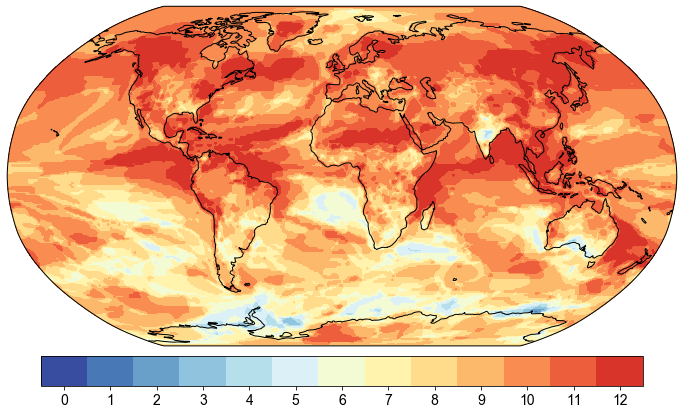

done saving file


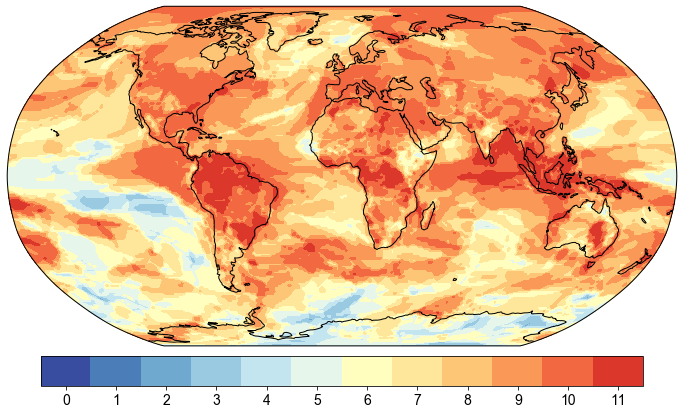

done saving file


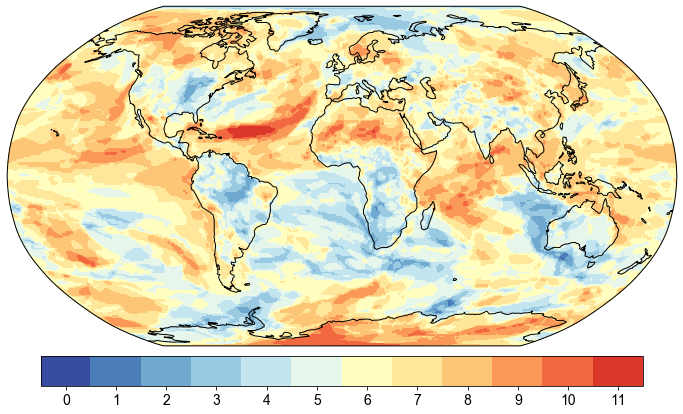

done saving file


In [30]:
ds_list = [positive_change_count_tot_rad, positive_change_count_phys_pi, positive_change_count_int]
mostly_agree_list = [mostly_agree_tot_rad, mostly_agree_phys_pi, mostly_agree_int]
model_nums = [num_tot_rad, num_phys_pi, num_int]
titles=['TOT-RAD','PHYS-PI','INTERACTION']
for i,ds in enumerate(ds_list):
    model_num=model_nums[i]   
    mostly_agree=mostly_agree_list[i]
    quick_map.quick_map(ds.values,
                        ds['lat'].values,
                        ds['lon'].values,
                        
                        clim=[-0.5,model_num+1.5],
                        cbar_inds=np.arange(0,model_num+1,1),
                        cmap=plt.cm.RdYlBu_r,
                        
                        contours=True,
                        extend_choice='neither',
                        color_interval=1,
                        
                        filepath=DIR_FIGURES+'Model_Agreement_'+titles[i]+'_'+str(END_YR))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


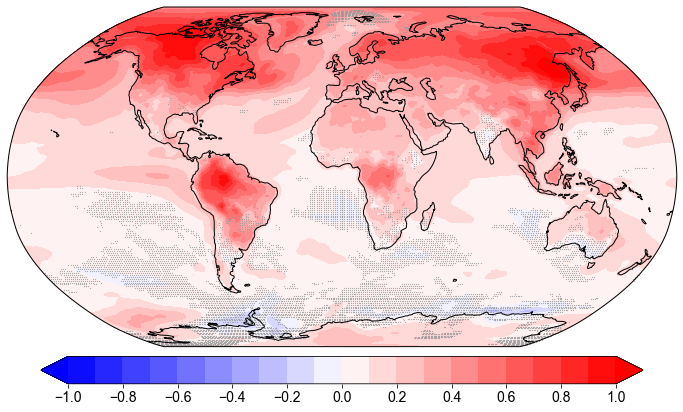

done saving file


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


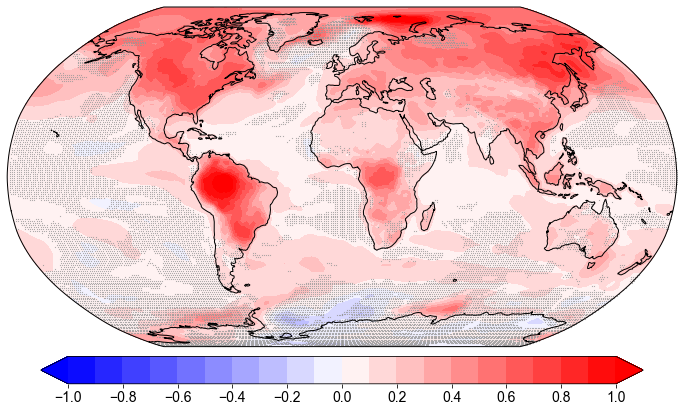

done saving file


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


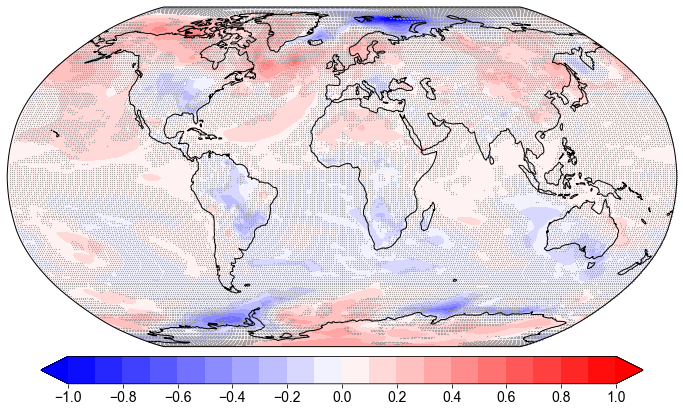

done saving file


In [31]:
mean_tot_rad = ds_all_models_tot_rad[VARNAME].mean(dim='modelname', skipna=True)
mean_phys_pi = ds_all_models_phys_pi[VARNAME].mean(dim='modelname', skipna=True)
mean_int = ds_all_models_int[VARNAME].mean(dim='modelname', skipna=True)
mostly_agree_list = [mostly_agree_tot_rad, mostly_agree_phys_pi, mostly_agree_int]
titles=['TOT-RAD','PHYS-PI','INTERACTION']

ds_list = [mean_tot_rad, mean_phys_pi, mean_int]
for i, ds in enumerate(ds_list):
    mostly_agree=mostly_agree_list[i]
    quick_map.quick_map(ds.values,
                        ds['lat'].values,
                        ds['lon'].values,
                        
                        clim=CLIM,
                        clevels=CLEVELS,
                        cbar_inds=CBAR_INDS,
                        cmap=plt.cm.bwr,
                        contours=True,
                        extend_choice='both',
                        color_interval=COLOR_INTERVAL,
                        
                        sighatch=True,
                        sigmask=-mostly_agree, #stippling where models do NOT agree
                        p=0,
                        markersize=0.05,
                        alpha_choice=1,
                        
                        filepath=DIR_FIGURES+'Mean_Change_'+titles[i]+'_'+str(END_YR))